In [157]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import re
import tensorflow as tf


In [158]:
train_data= pd.read_csv("csv/train.csv")
test_data= pd.read_csv("csv/test.csv")
train_data.name = "train_data"
test_data.name = "test_data"
data = [train_data, test_data]

In [159]:
titles = []
marker1 = ','
marker2 = '.'
for i, j in train_data.iterrows():
    title = re.search(', (.*?)\.', j['Name'])       
    if title.group(1) not in titles:        
        titles.append(title.group(1))    
print(titles)    

['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']


In [160]:
TitleDict = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty","Don": "Royalty", "Dona": "Royalty", "Sir" : "Royalty","Dr": "Royalty","Rev": "Royalty","the Countess":"Royalty", "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs","Mr" : "Mr","Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

In [161]:
def add_title(df):
    for i, j in df.iterrows():
        title = re.search(', (.*?)\.', j['Name'])  
        df.loc[i, "Title"] = TitleDict[title.group(1)]
    return df

for df in data:
    df = add_title(df)

In [162]:
def fill_age(df):
    df['Age'] = df.groupby(['Title','Sex','Parch'], group_keys=False)['Age'].apply(lambda x: x.fillna(x.median()))
    #if still exists missing ages, fill with median of only title, pclass and sex
    df['Age'] = df.groupby(['Title','Sex'], group_keys=False)['Age'].apply(lambda x: x.fillna(x.median()))
    return df

for df in data:
    df = fill_age(df)

d:\Software\Python\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Software\Python\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Software\Python\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [163]:
for df in data:
    for i, j in df.iterrows():
        if j["Cabin"] is not np.nan:
            deck = j["Cabin"][0] 
            df.loc[i, "Deck"] = deck
        else:
            df.loc[i, "Deck"] = "None" 

In [164]:
for df in data:
    df['Fare'] = df.groupby(['Deck','Embarked'], group_keys=False)['Fare'].apply(lambda x: x.fillna(x.median()))
    #if still exists missing ages, fill with median of only title, pclass and sex
    df['Fare'] = df.groupby(['Deck'], group_keys=False)['Fare'].apply(lambda x: x.fillna(x.median()))


In [165]:
for df in data:
    df['Embarked'] = (df.groupby('Fare', group_keys=False)['Embarked']
                        .apply(lambda s: s.bfill().ffill())
                    )

In [166]:
for df in data:
    df['Family_size'] = df['SibSp'] + df['Parch'] + 1    

In [167]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,None,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,None,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,None,1


In [168]:
for df in data:    
    df.drop(['PassengerId','Name','Cabin','Ticket','Parch','SibSp','Fare','Title'], axis=1, inplace=True)    

In [169]:
train_data.head()

,Survived,Pclass,Sex,Age,Embarked,Deck,Family_size
0,0,3,male,22.0,S,None,2
1,1,1,female,38.0,C,C,2
2,1,3,female,26.0,S,None,1
3,1,1,female,35.0,S,C,2
4,0,3,male,35.0,S,None,1


In [184]:
print(train_data["Family_size"].unique())

[ 2  1  5  3  7  6  4  8 11]


In [189]:
sc = MinMaxScaler()
for i,df in enumerate(data):
    df.rename(columns = {'Sex':'IsFemale'}, inplace = True)
    df["IsFemale"].replace(["male","female"], [0,1], inplace = True)

    # for column in ["Age"]:
    #     df[column] = sc.fit_transform(df[column].values.reshape(-1,1))

    # data[i] = pd.get_dummies(df, columns=['Deck',"Pclass","Embarked"])
    df["Age"] = df["Age"].astype(int)


    df["Embarked"].replace(["C","S","Q"], [0,1,2], inplace = True)
    df["Deck"].replace(['None', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], [8,7,6,5,4,3,2,1,0], inplace = True)



train_data, test_data=data
# test_data["Deck_T"] = 0
# test_data = test_data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,17,11,12,13,14,15,16]]

Family_size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


<Axes: xlabel='Family_size'>

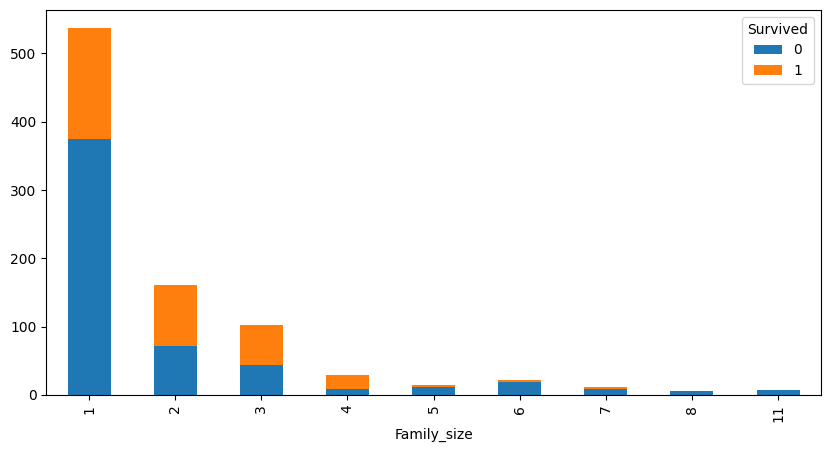

In [186]:
#percentages of groups that survived 
print(train_data.groupby(['Family_size'])['Survived'].mean())

train_data.groupby(['Family_size','Survived']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))



Age
(-0.08, 16.0]    0.513274
(16.0, 32.0]     0.332661
(32.0, 48.0]     0.435644
(48.0, 64.0]     0.434783
(64.0, 80.0]     0.090909
Name: Survived, dtype: float64


<Axes: xlabel='Age'>

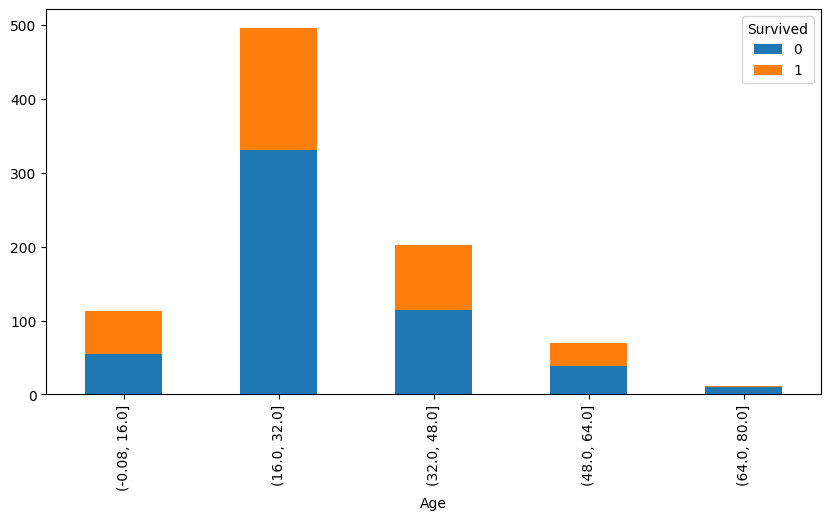

In [190]:
print(train_data.groupby(['Age'])['Survived'].mean())
train_data.groupby(['Age','Survived']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))

In [173]:
test_data.head(5)

,Pclass,IsFemale,Age,Embarked,Deck,Family_size
0,3,0,34,2,8,1
1,3,1,47,1,8,2
2,2,0,62,2,8,1
3,3,0,27,1,8,1
4,3,1,22,1,8,3


In [174]:
train_data.head(5)

,Survived,Pclass,IsFemale,Age,Embarked,Deck,Family_size
0,0,3,0,22,1,8,2
1,1,1,1,38,0,7,2
2,1,3,1,26,1,8,1
3,1,1,1,35,1,7,2
4,0,3,0,35,1,8,1


In [175]:
x = train_data[train_data.columns[1:]].values
y = train_data[train_data.columns[0]].values
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.8, random_state=0)

In [176]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(6, activation = 'relu'),
                             tf.keras.layers.Dense(3, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation="sigmoid")
                             ])

In [177]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['Accuracy'])

In [178]:
model.fit(x_train, y_train, batch_size=15, epochs=150, validation_data=(x_valid, y_valid))

Epoch 1/150
12/12 [==============================] - 1s 24ms/step - loss: 0.7445 - Accuracy: 0.4101 - val_loss: 0.7330 - val_Accuracy: 0.3590
Epoch 2/150
12/12 [==============================] - 0s 10ms/step - loss: 0.6984 - Accuracy: 0.4270 - val_loss: 0.6944 - val_Accuracy: 0.4488
Epoch 3/150
12/12 [==============================] - 0s 9ms/step - loss: 0.6868 - Accuracy: 0.5674 - val_loss: 0.6897 - val_Accuracy: 0.6325
Epoch 4/150
12/12 [==============================] - 0s 8ms/step - loss: 0.6865 - Accuracy: 0.5899 - val_loss: 0.6888 - val_Accuracy: 0.6339
Epoch 5/150
12/12 [==============================] - 0s 11ms/step - loss: 0.6863 - Accuracy: 0.5899 - val_loss: 0.6883 - val_Accuracy: 0.6339
Epoch 6/150
12/12 [==============================] - 0s 7ms/step - loss: 0.6857 - Accuracy: 0.5899 - val_loss: 0.6879 - val_Accuracy: 0.6367
Epoch 7/150
12/12 [==============================] - 0s 8ms/step - loss: 0.6854 - Accuracy: 0.5843 - val_loss: 0.6874 - val_Accuracy: 0.6311
Epoch 8/15

In [179]:
x_test = test_data.values
prediction = model.predict(x_test)
rounded = [int(round(x[0])) for x in prediction]
print(rounded)
len(rounded)

14/14 [==============================] - 0s 1ms/step
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1

418

In [180]:
solution_data_with_labels = pd.read_csv('csv/titanic_solution.csv')
test_data2 = pd.read_csv('csv/test.csv')

for i, name in enumerate(solution_data_with_labels['name']):
    if '"' in name:
        solution_data_with_labels['name'][i] = re.sub('"', '', name)

for i, name in enumerate(test_data2['Name']):
    if '"' in name:
        test_data2['Name'][i] = re.sub('"', '', name)    

survived = []
for name in test_data2['Name']:
    survived.append(int(solution_data_with_labels.loc[solution_data_with_labels['name'] == name]['survived'].values[-1]))

submission = pd.read_csv('csv/gender_submission.csv')
submission['Survived'] = survived
submission.to_csv('submission.csv', index=False)

C:\Users\eyber\AppData\Local\Temp\ipykernel_5080\638784303.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solution_data_with_labels['name'][i] = re.sub('"', '', name)
C:\Users\eyber\AppData\Local\Temp\ipykernel_5080\638784303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data2['Name'][i] = re.sub('"', '', name)


In [181]:
count = 0
for i in range(len(rounded)):
    if rounded[i] == survived[i]:
        count += 1
print(f"Percentaje: {count/len(rounded)*100}%")

Percentaje: 77.27272727272727%


In [182]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    random_state=2,
    n_estimators=25,
    min_samples_split=20,
    oob_score=True)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

In [183]:
count = 0
for i in range(len(predictions)):
    if predictions[i] == survived[i]:
        count += 1
        
print(f"Percentaje: {count/len(rounded)*100}%")

Percentaje: 76.31578947368422%
